In [1]:
from LTSpice_Simulator import get_Spice_Arrays
import Wavefront_Generation as MC
import Wavefront_Plotting as WP
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
input_values ={
    'L_time':'800',
    'C_time':'200',
    'L_impedance':'100',
}

interface = MC.Full_Cycle(**input_values)

LTSpice_outputs = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(interface.data_input.GCD/8))


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        40000
Inductor Capacitance Per Length :       4
Inductor Length :                       1
Inductor Total Inductance :             40000
Inductor Total Capacitance :            4
Inductor Velocity :                     0.0025
Inductor One Way Time Delay :           400
Inductor Impedance :                    100

- The Capacitor -
Capacitor Inductance Per Length :       100
Capacitor Capacitance Per Length :      100
Capacitor Length :                      1
Capacitor Total Inductance :            100
Capacitor Total Capacitance :           100
Capacitor Velocity :                    0.01
Capacitor One Way Time Delay :          100
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  12566.37061436000
Number of Wavefronts :                  8320
Number of Layers :                      64
Inductor Return Time De

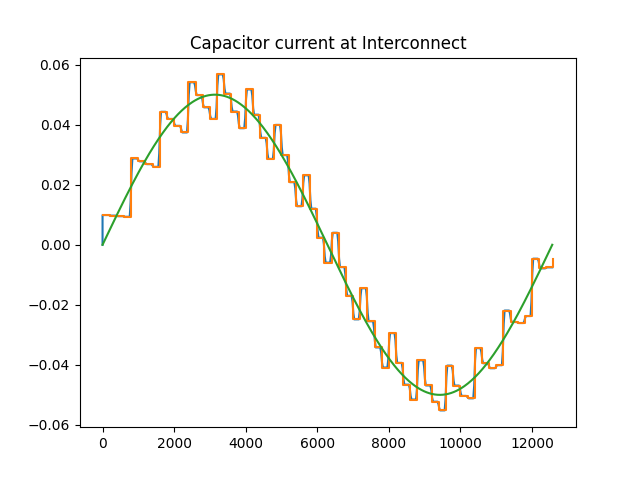

In [3]:
fig,ax = plt.subplots()

ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Tx'])
WP.plot_time_interconnect(interface.data_output_ordered,ax,'Current Capacitor',True)
ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Circuit'])

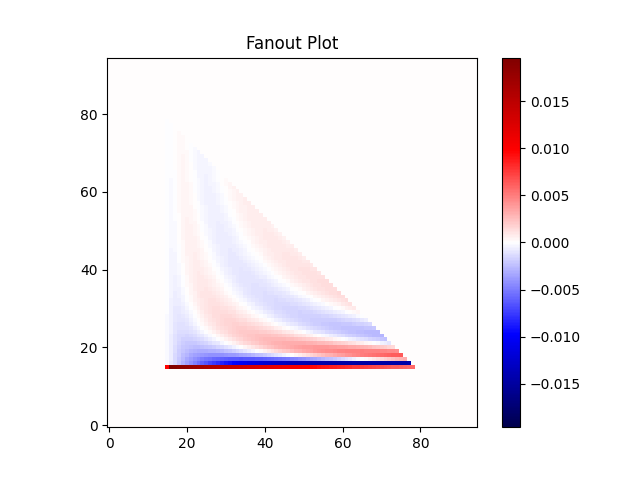

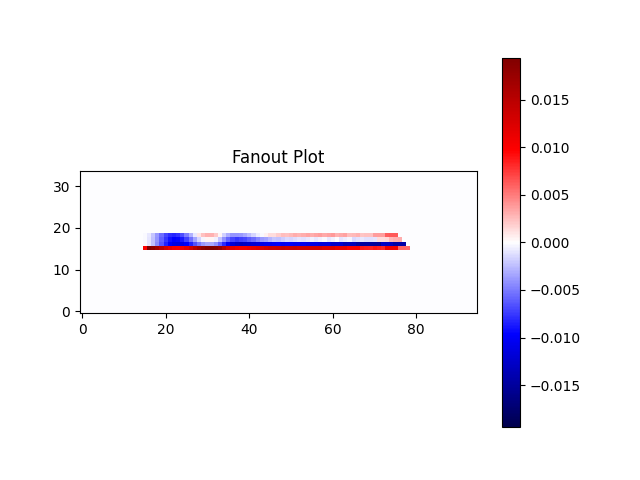

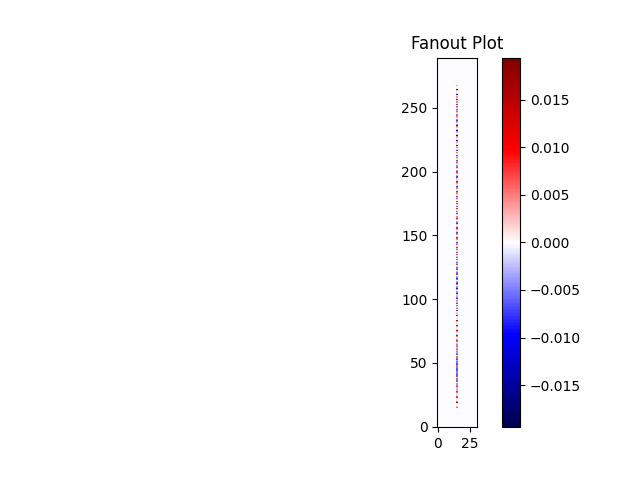

In [4]:
fig_fanout_commutative,ax_fanout_commutative = plt.subplots()
WP.plot_fanout_seismic(interface.data_output_commutative.Current_Interconnect_Capacitor.transpose(),ax_fanout_commutative)

fig_fanout_multiplicative,ax_fanout_multiplicative = plt.subplots()
WP.plot_fanout_seismic(interface.data_output_multiplicative.Current_Interconnect_Capacitor.transpose(),ax_fanout_multiplicative)

fig_fanout_multiplicative_alt,ax_fanout_multiplicative_alt = plt.subplots()
C_axis_merged = MC.transform_merged_array_to_C_axis(interface.data_input,interface.data_output_multiplicative.Current_Interconnect_Capacitor)
WP.plot_fanout_seismic(C_axis_merged.transpose(),ax_fanout_multiplicative_alt)

GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=12565.37061436)

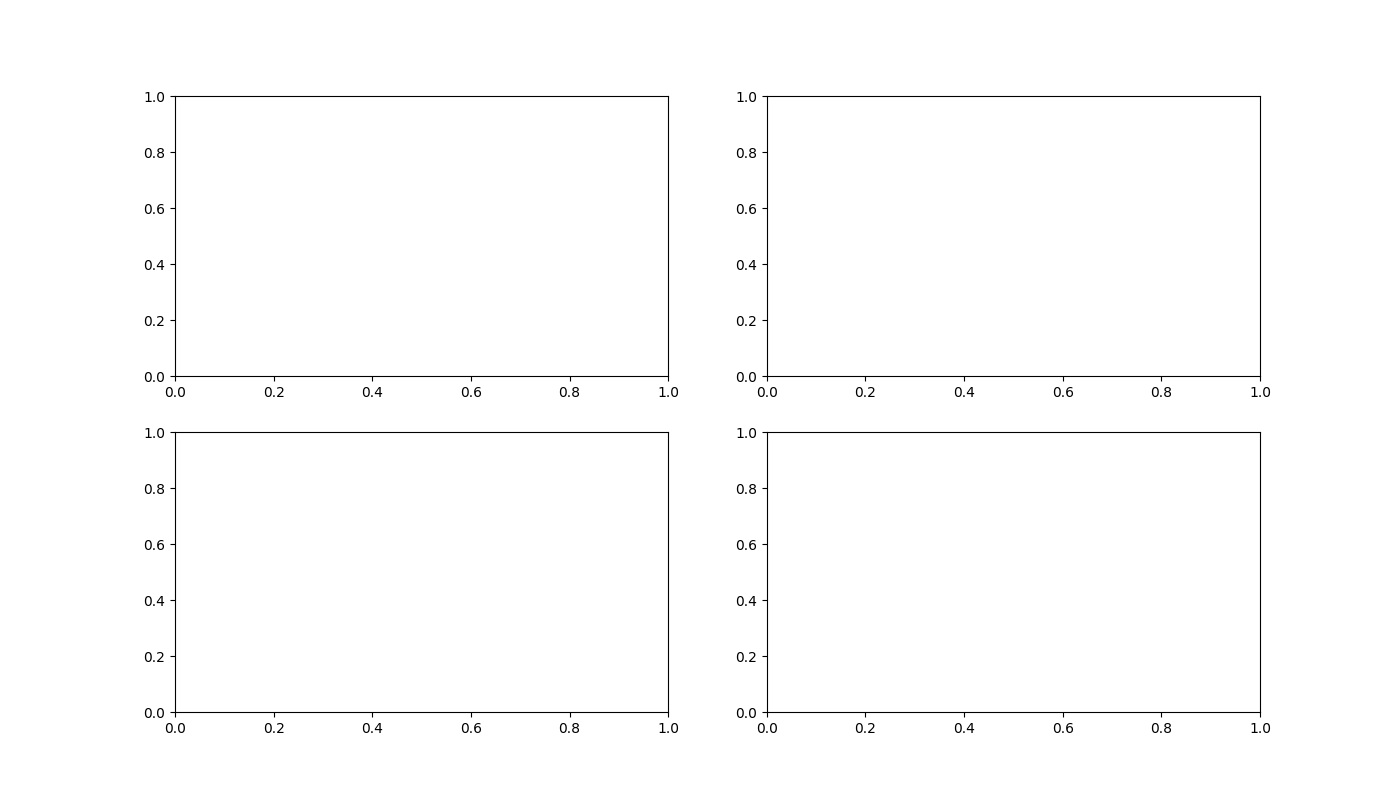

In [5]:
WP.spatial_interconnect_investigator_ui(interface.data_input,interface.data_output_multiplicative,interface.data_output_ordered)